<h1><center>Assignment 1 - Problem Statement-8 for ML Group 121</center></h1>
    <h2><center>PART B: Dataset-based Implementation</center></h2>

<h3>List of Team Members</h3>

|     Name     |     ID NO     |      Contribution     |
| :-: | :-: | :-: |
| Soumyadipta Maiti | 2021SC04237 | 100% |
| Dipannita Bandyopadhyay | 2021SC04700 | 100% |
| Tauheed Ahmad | 2021SC04698 | 100% |
| Tanvir Ahmad | 2021SA04035 | 100% |

# Table of Contents

1. [Problem Statement](#Problem-Statement)
2. [EDA](#A.-EDA-(Exploratory-Data-Analysis))
3. [Feature Engineering (Common Across Models)](#B.-Feature-Engineering-(Common-Across-Models))
4. [Classification](#1.-Classification)
5. [Regression](#2.-Regression)
4. [Ensemble ML](#3.-Ensemble-ML)

<h2>Problem Statement</h2>

Refer to the below attached Dataset on "Steel_Industry_Data" & perform the following four classes of activities using python-based APIs:

EDA <br>
Classification <br>
Regression <br>
Ensemble ML

["Steel_Industry_Data" Dataset](https://drive.google.com/file/d/1T2fai4Wy7HBActbKDu8LThTqXy0Ql90Y/view) 

<h4> Import of all required Packages</h4>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from feature_engine.selection import (
    DropConstantFeatures,
    DropDuplicateFeatures,
    SmartCorrelatedSelection,
)

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn import metrics
import scipy.stats as stats
from sklearn.feature_selection import SelectFromModel
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, adjusted_rand_score
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

<h4>Uplaod of Original Data from excel file into DataFarme</h4>

In [3]:
df_siec = pd.read_csv('Steel_industry_data.csv')

#Back-up of Original DataFrame
df_siec_org = df_siec.copy(deep=True)

In [4]:
df_siec.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01-01-2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01-01-2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01-01-2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01-01-2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01-01-2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


<h2>A. EDA (Exploratory Data Analysis)</h2>

<h4>A.1 Shape of Initial Dataset along with descriptive statistics & concise summary of a DataFrame</h4>

In [5]:
print(f"Shape of Original DataSet : {df_siec.shape}")

Shape of Original DataSet : (35040, 11)


In [6]:
print("Descriptive Statistic of Original DataSet : \n")
df_siec.describe()

Descriptive Statistic of Original DataSet : 



,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [7]:
print("Concise Summary of Original DataSet : \n")
df_siec.info()

Concise Summary of Original DataSet : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             3504

<h4>A.2 Handling Missing Values</h4>

In [8]:
df_siec.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

<h4>There is no null/missing values in this dataset.</h4>

<h4>A.3 Feature Analysis</h4>

Target variable is: <br>
"Usage_kWh" (continious variable) for Regression & Ensemble Models <br>
"Load_Type" (categorical variable) for Classification Model <br>    

<h4>A.4 Data visualization</h4>

Multivariate Analysis (to analyse relation between each combinatio  of two features)

In [9]:
WIDTH_SIZE = 30
HEIGHT_SIZE = 10

Plot of Independent Variables wrt Dependent Variables : 



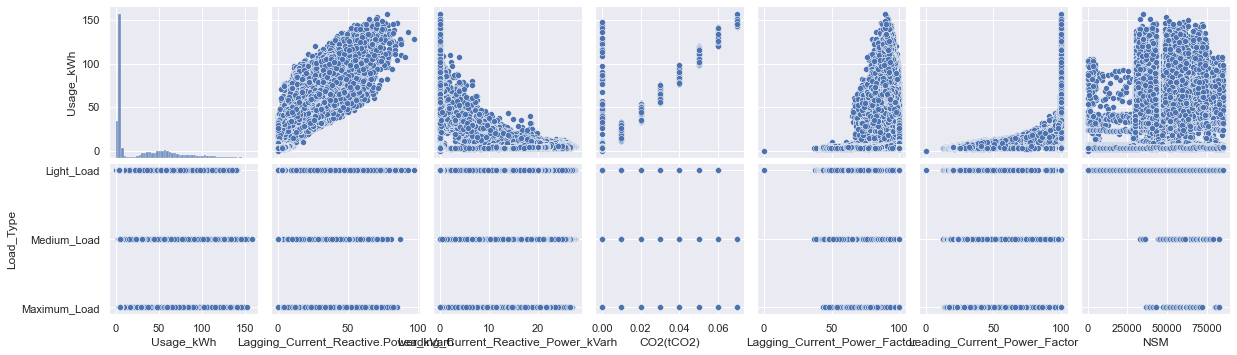

In [10]:
print("Plot of Independent Variables wrt Dependent Variables : \n")

sns.set(rc={'figure.figsize':(WIDTH_SIZE,HEIGHT_SIZE)})
sns.pairplot(df_siec,
x_vars=['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
y_vars=['Usage_kWh','Load_Type'])

plt.show()

Checking correlation using heatmap

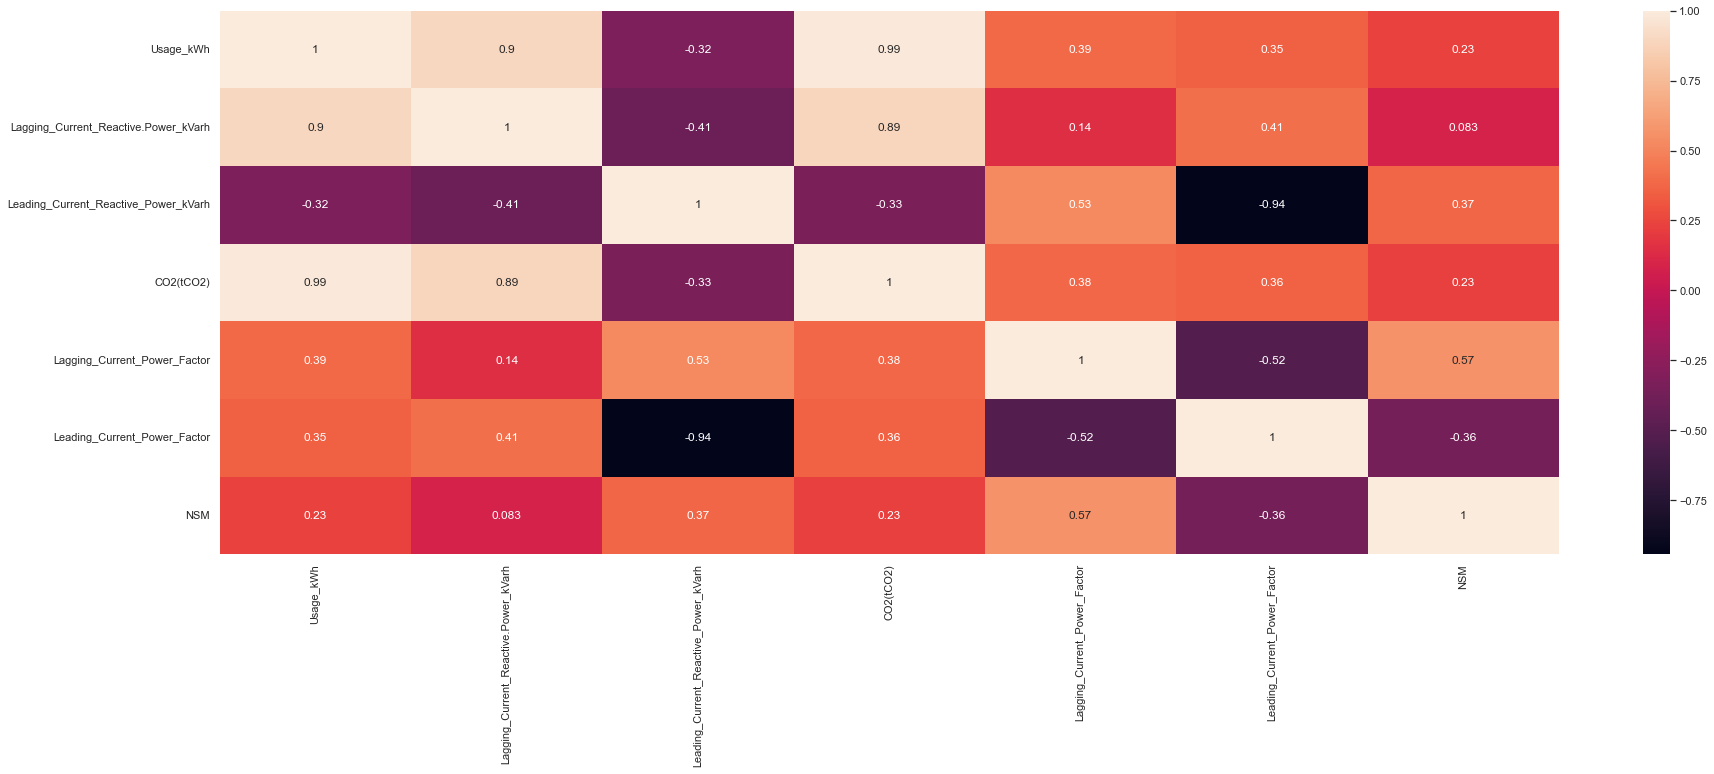

In [11]:
fig, ax = plt.subplots(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
sns.heatmap(df_siec.corr(method='pearson'), annot=True)
plt.show()

<h4>A.5 Inference about Analysis learned from visualizations</h4>

From above Correlation Matrix, followings can be inferred for linear regression:

- For "Usage_kWh"==>'Lagging_Current_Reactive.Power_kVarh' & 'CO2(tCO2)' are highly +ve correlated.
- For "Load_Type"==>'NSM' is highly + ve correlated.
- For "CO2(tCO2)"==>'Lagging_Current_Reactive.Power_kVarh' is highly +ve correlated.
- For "Leading_Current_Reactive_Power_kVarh "==>'Leading_Current_Power_Factor' is highly -ve correlated.

For Linear regression, 'Lagging_Current_Reactive.Power_kVarh' & 'CO2(tCO2)' should be considered as independent variables as they are highly +ve correlated to target variable Usage_kWh.


<h2><center>B. Feature Engineering (Common Across Models)</center></h2>

<h3>B.1 Parsing 'Date' column into Year, Month, Day, Hour & Minute</h3>

In [12]:
x_date = pd.to_datetime(df_siec['date'], format='%d-%m-%Y %H:%M')

In [13]:
df_siec['date_year']=x_date.dt.year
df_siec['date_month']=x_date.dt.month
df_siec['date_day']=x_date.dt.day
df_siec['date_hour']=x_date.dt.hour
df_siec['date_minute']=x_date.dt.minute
df_siec.drop('date', axis=1,inplace=True)

In [14]:
df_siec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
 10  date_year                             35040 non-null  int64  
 11  date_month     

<h3>B.2 Encoding for Categorical Variables</h3>

In [15]:
# Analysis of categorical Values
df_siec_cat = df_siec.select_dtypes(include='object')

print('Analysis of categorical Values for Dataset:\n')

for col in df_siec_cat:
    print(f'Field {col} has unique values: {df_siec[col].unique()}')

Analysis of categorical Values for Dataset:

Field WeekStatus has unique values: ['Weekday' 'Weekend']
Field Day_of_week has unique values: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
Field Load_Type has unique values: ['Light_Load' 'Medium_Load' 'Maximum_Load']


In [16]:
print('Hence, "Load_Type" can be treated as Ordinal & "WeekStatus" & "Day_of_week" cab be treated as Nominal categorical Fields.')


Hence, "Load_Type" can be treated as Ordinal & "WeekStatus" & "Day_of_week" cab be treated as Nominal categorical Fields.


<h4>B.2.1 Label Encoding for Ordinal Variables</h4>

In [17]:
le = preprocessing.LabelEncoder()
df_siec['Load_Type']=le.fit_transform(df_siec['Load_Type'])

df_siec['Load_Type'].value_counts()

0    18072
2     9696
1     7272
Name: Load_Type, dtype: int64

<h4>B.2.2 One-Hot Encoding for Nominal Variables:</h4>
This process takes categorical variables, such as days of the week and converts it to a numerical representation 
without an arbitrary ordering.    

In [18]:
df_siec = pd.get_dummies(df_siec)

# ohe = preprocessing.OneHotEncoder()
# df_siec['Load_Type']=ohe.fit_transform(df_siec['Load_Type'])


<h3>B.3 Handling Outliers</h3>

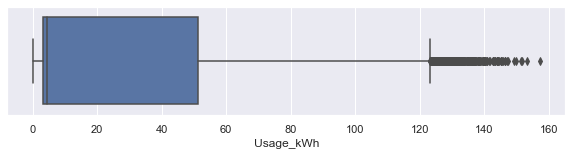

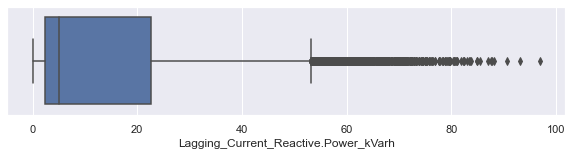

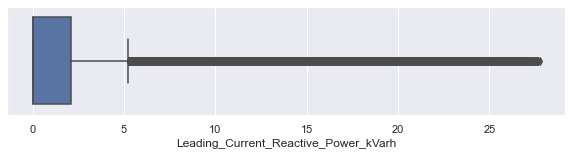

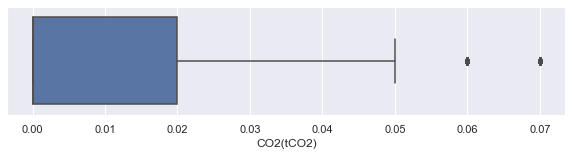

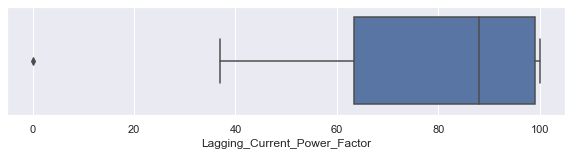

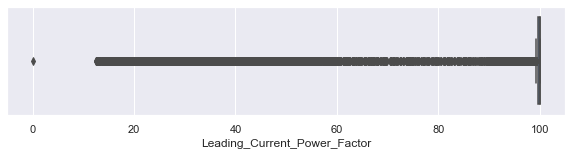

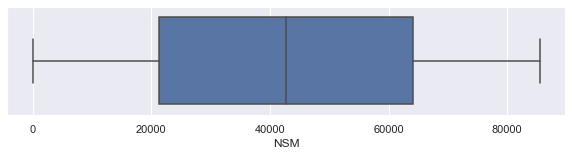

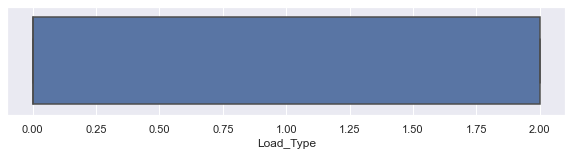

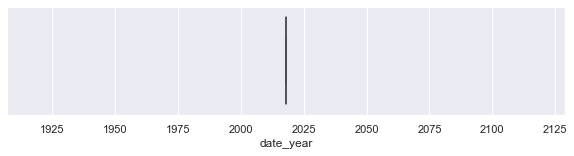

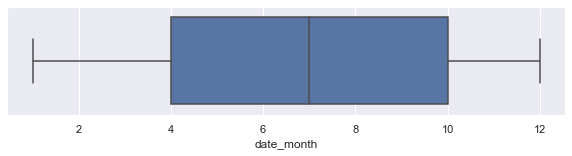

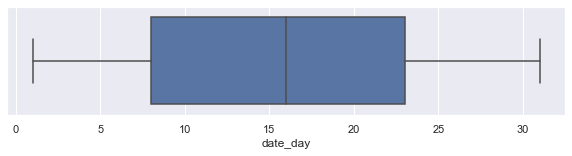

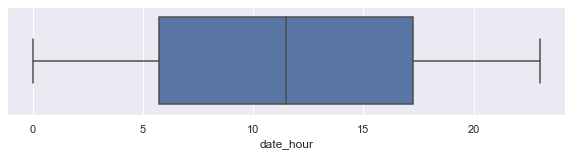

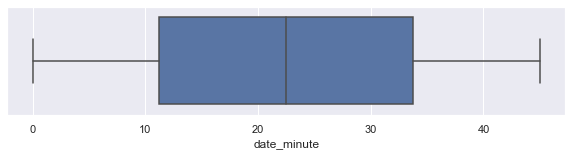

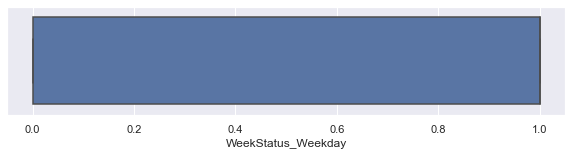

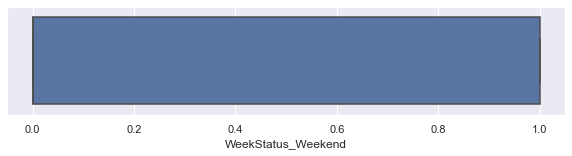

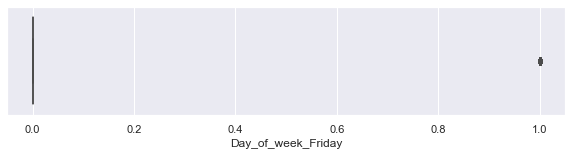

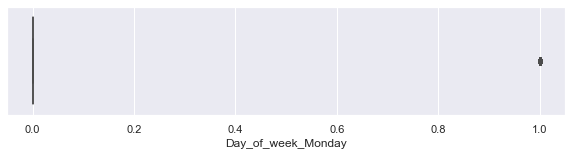

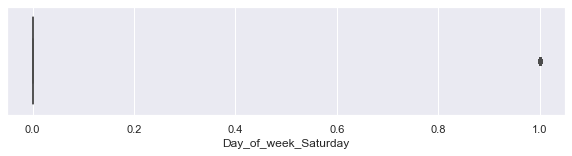

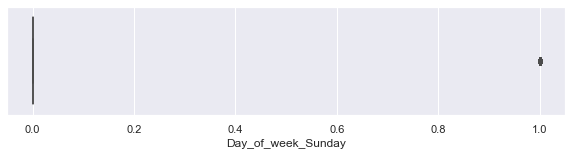

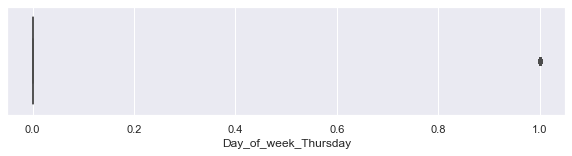

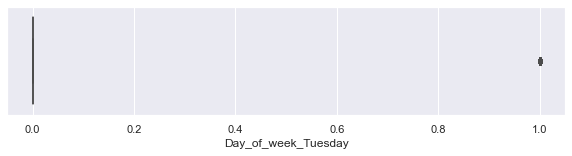

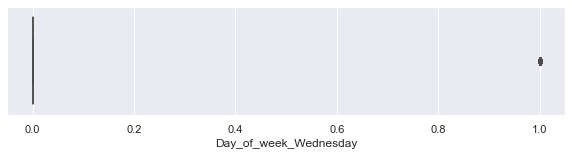

In [19]:
#selection of numeric columns
df_no=df_siec.select_dtypes(exclude=['object'])

for col in df_no:
    plt.figure(figsize=(10,2))
#     sns.set(rc={'figure.figsize':(WIDTH_SIZE,HEIGHT_SIZE)})
    sns.boxplot(x=col, data=df_no)

In [20]:
df_siec['Leading_Current_Power_Factor'].value_counts()

100.00    24430
99.99       454
99.98       207
99.97       114
99.96       111
          ...  
15.81         1
49.79         1
93.43         1
32.26         1
31.65         1
Name: Leading_Current_Power_Factor, Length: 3366, dtype: int64

As 'Leading_Current_Power_Factor' has mode of value 100 having 24430 occurance, its upper & lower bound is calculated 
by considering 3*IQR to avoid excessive outlier detection wrt this feature <br>
Upper Bound = Q3 + 3 * IQR <br>
Lower Bound = Q1 - 3 * IQR

<h4>Removal of Outliers</h4>

In [21]:
df_siec_final = df_siec.copy(deep=True)

In [22]:
### Detecting the outliers using IQR and removing them

def outlier_process(df, col, q1_percnt, q3_percnt):
    q1 = np.percentile(df[col], q1_percnt, interpolation='midpoint')
    q3 = np.percentile(df[col], q3_percnt, interpolation='midpoint')


    iqr = q3 - q1
    
    if iqr == 0:
        return df
    
    elif col == 'Leading_Current_Power_Factor':
        upper = np.where(df[col] >= (q3 + 3 * iqr))
        lower = np.where(df[col] <= (q1 - 3 * iqr))
        
    else:
        upper = np.where(df[col] >= (q3 + 1.5 * iqr))
        lower = np.where(df[col] <= (q1 - 1.5 * iqr))
            

    ''' Removing the Outliers '''
    df.drop(upper[0], inplace=True)
    try:
        df.drop(lower[0], inplace=True)
    except:
        print('index already deleted!!!')

    df.reset_index(drop=True, inplace=True)

    return df

In [23]:
df_siec_final = df_siec.copy(deep=True)
for col in df_siec_final:
    df_siec_final = outlier_process(df_siec_final, col, 25, 75)

print("Shape of Original DataSet : ", df_siec_org.shape)
print("Shape of Modified DataSet after  Feature Engineering & Outlier Removal : ", df_siec_final.shape)


Shape of Original DataSet :  (35040, 11)
Shape of Modified DataSet after  Feature Engineering & Outlier Removal :  (25600, 22)


<h3>Feature Scaling</h3>

###### Functions for Encoding of Categorical variables

In [24]:
def Encoding_StandardScaler(X_train, X_test):
    sscalar = StandardScaler()
    X_train = sscalar.fit_transform(X_train)
    X_test = sscalar.transform(X_test)
    return X_train, X_test

In [25]:
def Encoding_MinMaxScaler(X_train, X_test):
    mmscalar = MinMaxScaler(feature_range=(0,1))
    X_train_mm_sc = mmscalar.fit_transform(X_train)
    X_test_mm_sc = mmscalar.transform(X_test)
    return X_train, X_test

<h3>Function for Evaluation Metrics</h3>

In [26]:
def model_eval_classification(model, y_test, y_pred):
    conf_mtrx = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)  
#     fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_dtc)
#     auc = metrics.roc_auc_score(y_test, y_pred_dtc)
    class_rep = classification_report(y_test, y_pred,output_dict=True)
    
    return model, conf_mtrx, accuracy, class_rep

<h2><center>1. Classification</center></h2>

<h3>1.1 Pre-processing / Feature Engineering</h3>
after performing common Feature Engineering Steps (Across Models) as described above. 

<h4>1.1.1 Classification Model</h4>

Target Variable is Load_Type & it's of Categorical type.

In [27]:
X_clf = df_siec_final.iloc[:,df_siec_final.columns!='Load_Type']
y_clf = df_siec_final.iloc[:,df_siec_final.columns =='Load_Type']

<h4>1.1.2 Splitting Dataset into Train & Test dataset</h4>

In [28]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf,y_clf, test_size=.3, random_state=25)

In [29]:
print(f"Dimension of Training Set : X = {X_train_clf.shape} && Y = {y_train_clf.shape}")
print(f"Dimension of Testing Set : X = {X_test_clf.shape} && Y = {y_test_clf.shape}")

Dimension of Training Set : X = (17920, 21) && Y = (17920, 1)
Dimension of Testing Set : X = (7680, 21) && Y = (7680, 1)


In [40]:
X_train_clf.head(5)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,date_year,date_month,date_day,...,date_minute,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
5857,3.64,4.50,0.00,0.00,62.89,100.0,1800,2018,3,28,...,30,1,0,0,0,0,0,0,0,1
13061,3.28,3.60,0.00,0.00,67.35,100.0,84600,2018,7,8,...,30,0,1,0,0,0,1,0,0,0
12066,2.84,3.56,0.00,0.00,62.36,100.0,27900,2018,6,25,...,45,1,0,0,1,0,0,0,0,0
22705,69.52,37.04,0.00,0.03,88.25,100.0,48600,2018,11,19,...,30,1,0,0,1,0,0,0,0,0
153,54.32,7.13,0.04,0.02,99.15,100.0,36000,2018,1,3,...,0,1,0,0,0,0,0,0,0,1


In [41]:
X_clf.head(5)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,date_year,date_month,date_day,...,date_minute,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,3.17,2.95,0.0,0.0,73.21,100.0,900,2018,1,1,...,15,1,0,0,1,0,0,0,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,2018,1,1,...,30,1,0,0,1,0,0,0,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,2018,1,1,...,45,1,0,0,1,0,0,0,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,2018,1,1,...,0,1,0,0,1,0,0,0,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,2018,1,1,...,15,1,0,0,1,0,0,0,0,0


<h4>1.1.3 Feature Selection</h4>
using Pipeline & Wrapper Method via Exhaustive Feature Selection

In [30]:
# we stack all the selection methods inside a pipeline

pipeline_clf = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
    ('correlation', SmartCorrelatedSelection(selection_method='variance')),
]
)

pipeline_clf.fit(X_train_clf)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [31]:
# removal of features after Feature Selection

X_train_clf = pipeline_clf.transform(X_train_clf)
X_test_clf = pipeline_clf.transform(X_test_clf)

X_train_clf.shape, X_test_clf.shape

((17920, 16), (7680, 16))

<h5>Exhaustive Feature Selection of Wrapper Method</h5>

Removal of Features using __Wrapper Method__ via __Exhaustive Feature Selection__ due to followings: <br>
 - Wrapper Method of Feature Selection has better predictive accuracy than filter & Embedded method
 - Best performing feature subset for the predefined classifier. 
Exhaustive Feature Selection (EFS) evaluates all combinations and determine the best 
subset of features compared to Step Forward Selection (SFS) & Step BACKWARD Selection (SBS)

 - Although this Greedy Sequential Algorithm is Computationally expensive, still Wrapper Method can be used considering fact that no. of independent variables are moderate (around 20).

In [32]:
efs = EFS(RandomForestClassifier(n_estimators=5,
                                n_jobs=4,
                                random_state=0,
                                max_depth=2),
          min_features=5,
          max_features=10,
          scoring='r2',
          print_progress=True,
          cv=2)

efs = efs.fit(np.array(X_train_clf), y_train_clf)

Features: 55734/56134

In [33]:
efs.best_idx_

(1, 3, 4, 8, 9)

In [34]:
selected_feat = X_train_clf.columns[list(efs.best_idx_)]
selected_feat

Index(['Leading_Current_Reactive_Power_kVarh', 'Leading_Current_Power_Factor',
       'NSM', 'WeekStatus_Weekday', 'Day_of_week_Friday'],
      dtype='object')

<h4>1.1.4 Feature Scaling (Independent Variables)</h4>

As SVM, KNN, Regression, K-Means Clustering Models is affected by magnitude of Featues, 
Feature Scaling is required for these models.

In [35]:
#Feature Scaling is performed via StandardScaler
X_train_clf,X_test_clf = Encoding_StandardScaler(X_train_clf,X_test_clf)

<h3>1.2 Machine Learning Activity</h3>

As no of distinct values of target variable is 3, will not implement Logistics Regression as it's more appropriate 
for binary target variable. Will try following Classification Models:

1. __SVM__ : One of most popular Supervised Learning algorithms for Classification. Goal of the SVM algorithm is to create the best decision boundary (hyperplane) that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. 
2. __Decision Tree__ : most powerful classifier. A Decision tree is a flowchart like a tree structure, where each internal node denotes a test on an attribute (a condition), each branch represents an outcome of the test (True or False), and each leaf node (terminal node) holds a class label.
3. __KNN__ : A non-linear classifier (and hence, the prediction boundary is non-linear) that predicts which class a new test data point belongs to by identifying its k nearest neighbors’ class based on Euclidean distance. 
4. __Naive Bayes__ : works on the basis of Bayes’ Theorem. The fundamental assumptions made are that all the features are independent of one another and contribute equally to the outcome; all are of equal importance. 

<h4>1.2.1 Attributes of Interest</h4>

In [36]:
print(f"Final Set of Dependent Attributes selected Classification Model : \n\n{selected_feat}")

Final Set of Dependent Attributes selected Classification Model : 

Index(['Leading_Current_Reactive_Power_kVarh', 'Leading_Current_Power_Factor',
       'NSM', 'WeekStatus_Weekday', 'Day_of_week_Friday'],
      dtype='object')


In [37]:
X_train_clf

array([[-0.79431387, -0.28495862, -0.62579073, ..., -0.42100293,
        -0.42604283,  2.40153526],
       [-0.80694031, -0.28495862, -0.38387976, ..., -0.42100293,
        -0.42604283, -0.4164003 ],
       [-0.82237264, -0.28495862, -0.654538  , ..., -0.42100293,
        -0.42604283, -0.4164003 ],
       ...,
       [-0.74135293, -0.28495862, -0.25316105, ..., -0.42100293,
        -0.42604283,  2.40153526],
       [ 1.67135083,  0.80401646,  1.34963475, ..., -0.42100293,
        -0.42604283, -0.4164003 ],
       [-0.77923227, -0.03059948,  0.37005803, ...,  2.37528041,
        -0.42604283, -0.4164003 ]])

In [38]:
print(f"Target Attribute selected Classification Model : \n\n{y_test_clf.columns}")

Target Attribute selected Classification Model : 

Index(['Load_Type'], dtype='object')


<h4>1.2.2 Base Classifier & Training / Testing of Model</h4>

##### SVM (Support Vector Machine)

 - Performant, not biased by outliers, not sensitive to overfitting.
 - Not the best choice for non-linear problems, large number of features.
 - Hyper Parameters :
  - C : Regularization parameter. Strength of regularization is inversely proportional to C. 
    Must be strictly positive. Penalty is a squared l2 penalty.
  - kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} Specifies kernel type to be used in algorithm.
  - gamma : {'scale', 'auto'} Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

In [39]:
# HyperParameters are set to default values as C = 1.0, kernel= 'rbf' , gamma = 'scale'
svc = SVC()
svc.fit(X_train_clf, y_train_clf)
y_pred_svc = svc.predict(X_test_clf)

###### Decision Tree

 - Interpretability, no need for feature scaling, works on both linear / non – linear problems.
 - Poor results on very small datasets, overfitting can easily occur.
 - HyperParameters :
   - criterion : {"gini", "entropy", "log_loss"}, Function to measure quality of a split. 
   - splitter : {"best", "random"}, Strategy used to choose split at each node. 

In [40]:
# HyperParameters are set to defualts as criterion = "gini" & splitter = "best"
dtc = DecisionTreeClassifier()
dtc.fit(X_train_clf, y_train_clf)
y_pred_dtc = dtc.predict(X_test_clf)

In [41]:
type(X_train_clf)
type(y_train_clf)
type(X_test_clf)
y_train_clf_arr = y_train_clf.to_numpy()
X_test_clf.shape
X_train_clf.shape

(17920, 16)

##### KNN (K-Nearest Neighbour)

 - Simple to understand, fast and efficient.
 - Need to manually choose the number of neighbours ‘k’.
 - Hyperparameter : n_neighbors : Number of neighbors to use.

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_clf, y_train_clf)
knn.fit(X_train_clf, y_train_clf_arr)
y_pred_knn = knn.predict(X_test_clf)

###### Naive Bayes
 - Efficient, not biased by outliers, works on non – linear problems, probabilistic approach.
 - Gaussian Naive Bayes is a type of Naive Bayes classifier that follows the normal distribution.
 - biggest advantage of Naive Bayes - it performs relatively well even when the training data size is small.

In [43]:
gnb = GaussianNB()
gnb.fit(X_train_clf,y_train_clf)
y_pred_gnb = gnb.predict(X_test_clf)

<h3>1.3 Model Evaluation</h3>

#### Evaluation Matrix for Classification Algoriths

 - Accuracy : Ratio of number of correct predictions to total number of predictions. Not a good choice with unbalanced classes.
 - Precision / Positive Predictive Value (PPV) : <br>
   Ratio of True Positives to all positives predicted by model. It is useful for skewed & unbalanced dataset. More False positives model predicts, lower the precision.
 - Recall / Sensitivity / True Positive Rate(TPR) : Ratio of true positives to all positives in your dataset.
 - F1-Score : Weighted average of precision and recall. Higher the F1 score, better is performance of our model. 

In [44]:
model_eval_list = pd.DataFrame(columns=['Model', 'Confusion Matrix', 'Accuracy', 'Classification Report'])
# list1 = ['LR',2,3.4]
model, conf_matrix, accuracy_scr, class_rep = model_eval_classification('SVM',y_test_clf,y_pred_svc)
model_eval = [model,conf_matrix, accuracy_scr,class_rep]
model_eval_list.loc[len(model_eval_list)] = model_eval

model, conf_matrix, accuracy_scr, class_rep = model_eval_classification('Decision Tree',y_test_clf,y_pred_dtc)
model_eval = [model,conf_matrix, accuracy_scr,class_rep]
model_eval_list.loc[len(model_eval_list)] = model_eval

model, conf_matrix, accuracy_scr, class_rep = model_eval_classification('KNN',y_test_clf,y_pred_knn)
model_eval = [model,conf_matrix, accuracy_scr,class_rep]
model_eval_list.loc[len(model_eval_list)] = model_eval

model, conf_matrix, accuracy_scr, class_rep = model_eval_classification('Gaussian Naive Bayes',y_test_clf,y_pred_gnb)
model_eval = [model,conf_matrix, accuracy_scr,class_rep]
model_eval_list.loc[len(model_eval_list)] = model_eval

txt_Model = "Model Name"
txt_Accuracy = "Accuracy"
txt_Precision = "Precision"
txt_Recall = "Recall"
txt_F1 = "F1-Score"

print(f"\033[1m{txt_Model:{20}} \t {txt_Accuracy:{20}} \t {txt_Precision:{20}} \t {txt_Recall:{20}} \t {txt_F1:{20}}\033[0m")
for row_ind in model_eval_list.index:
    print(f'''{model_eval_list['Model'][row_ind]:<{20}} \t {model_eval_list['Accuracy'][row_ind]:<{20}} \t {model_eval_list['Classification Report'][row_ind]['weighted avg']['precision']:<{20}}\t {model_eval_list['Classification Report'][row_ind]['weighted avg']['recall']:<{20}}\t {model_eval_list['Classification Report'][row_ind]['weighted avg']['f1-score']:<{20}}''')


Model Name           	 Accuracy             	 Precision            	 Recall               	 F1-Score            
SVM                  	 0.8346354166666666   	 0.8443065325001025  	 0.8346354166666666  	 0.8272806124365029  
Decision Tree        	 0.995703125          	 0.9957027816078449  	 0.995703125         	 0.9957015530340448  
KNN                  	 0.8217447916666667   	 0.8234121801693054  	 0.8217447916666667  	 0.8201758599411384  
Gaussian Naive Bayes 	 0.730078125          	 0.7242849762120929  	 0.730078125         	 0.6948605289243263  


<h3>1.4 Observation about Result</h3>

 - Accuracy, Precision, Recall & F1-Score are best (more than 99%) for Decision Tree compared to other classification models.
 - Accuracy doesn’t grant us much information regarding distribution of false positives & false negatives.
 - Precision takes into account how both positive & negative samples were classified, but recall only considers positive samples    in its calculations.
 - Precision considers when a sample is classified as Positive, but it does not care about correctly classifying all positive  
   samples. Recall cares about correctly classifying all positive samples, but it does not care if a negative sample is  
   classified as positive.
 - Higher is F1 score of any model , better is its performance.

As F1 Score for __Decision Tree__ is highest, it's best classification Model wrt given DataSet. 

<h4>1.4.1 Visualizing the performance of our model</h4>

<h5>Plotting of Confusion Matrix</h5>

- Confusion Matrix: a table that shows number of correct & incorrect predictions made by model compared with actual classifications in test set 
- Also known as an error matrix, is a specific table layout that allows visualization of performance of an algorithm.

Visualuzation of Confusion Matrix for Decision Tree : 


<Figure size 2160x720 with 0 Axes>

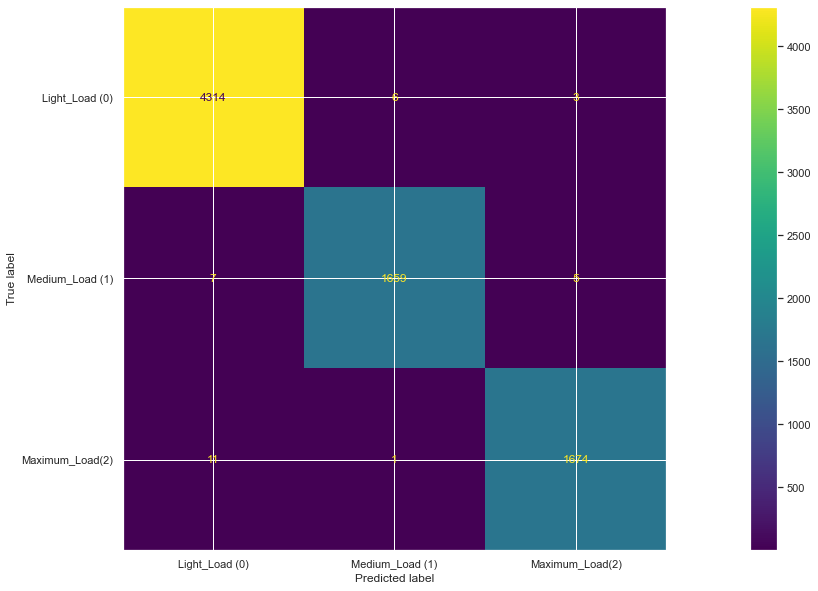

In [45]:
print(f"Visualuzation of Confusion Matrix for Decision Tree : ")

fig = plt.figure(figsize=(WIDTH_SIZE, HEIGHT_SIZE))

cf_model = model_eval_list['Confusion Matrix'][1]
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cf_model,display_labels=['Light_Load (0)', 'Medium_Load (1)', 'Maximum_Load(2)'])
cm_plot.text_ = 'Actual values'
cm_plot.plot()
plt.show()

<h1><center>2. Regression</center></h1>

<h2>2.1 Pre-Processing / Feature Engineering</h2>
after performing common Feature Engineering Steps (Across Models) as described above.

<h4>2.1.1 Linear Regression Model</h4>

Target Variable for Regression Model is Usage_kWh & it's continious in nature.

<h4>2.1.2. Univariate & Bivariate Analaysis of Features</h4>

In [46]:
def uni_bi_variate_analysis(df,variable):
    plt.figure(figsize=(10,5))
    plt.suptitle(variable)
    plt.subplot(1,2,1)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist='norm', plot=plt)

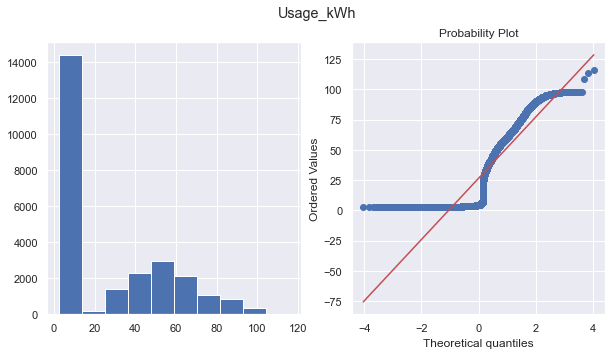

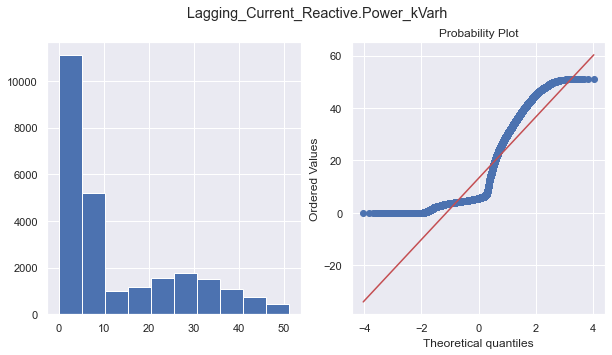

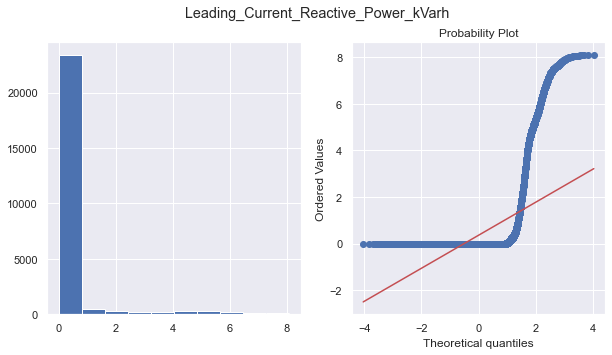

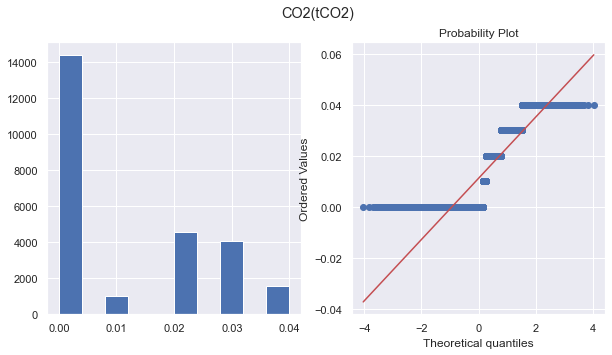

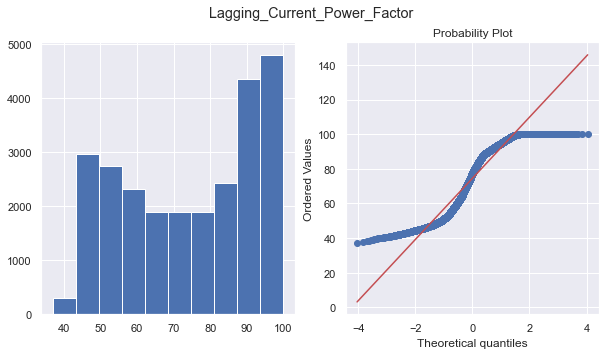

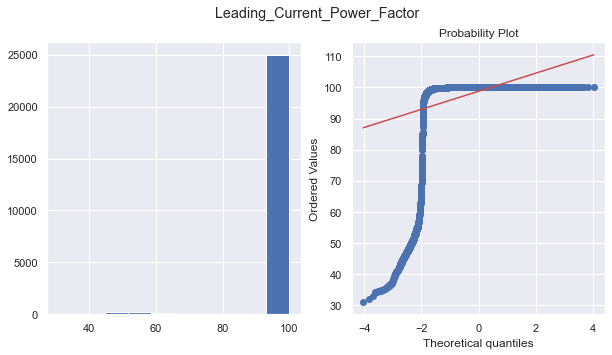

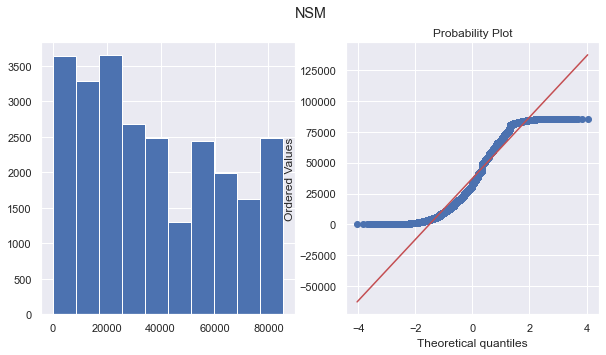

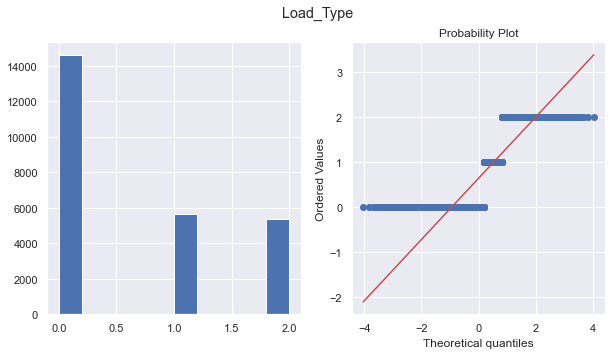

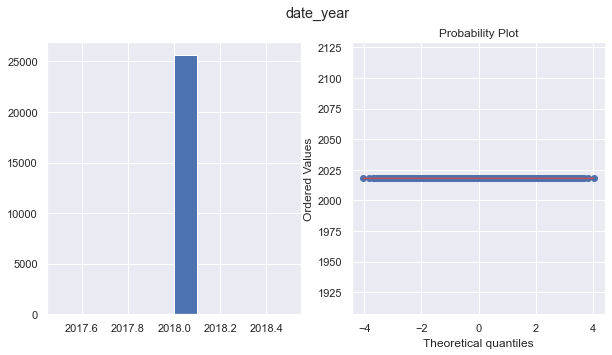

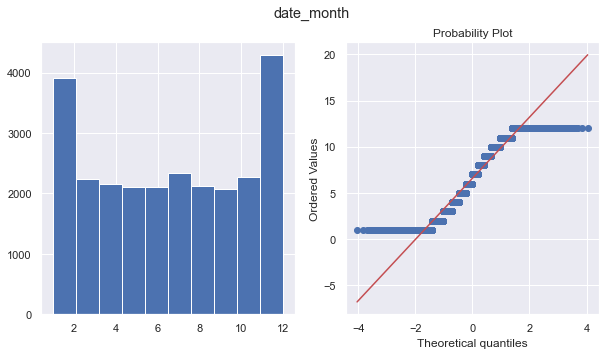

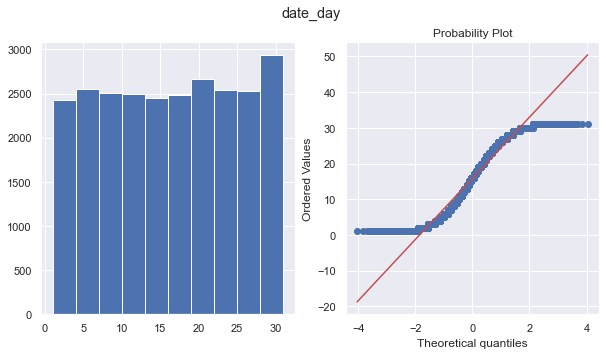

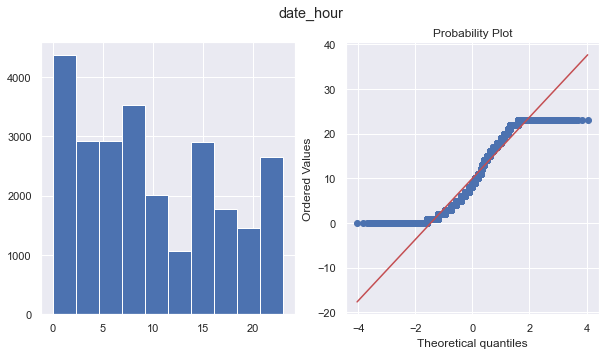

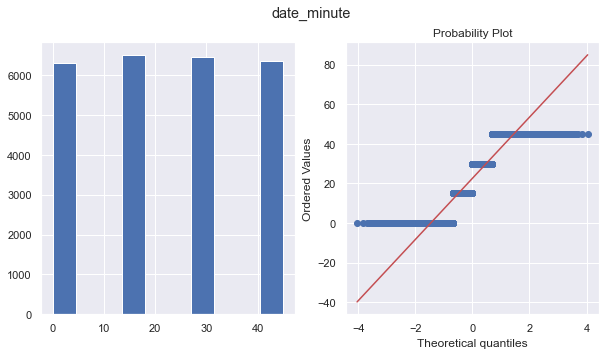

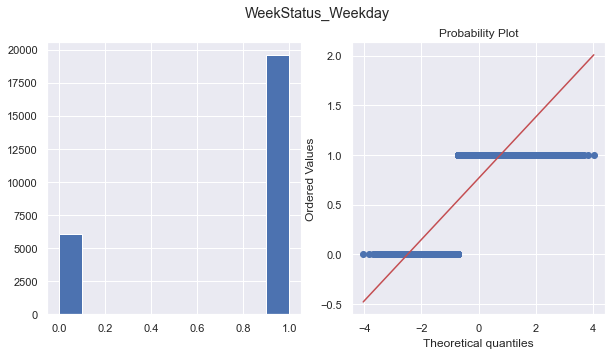

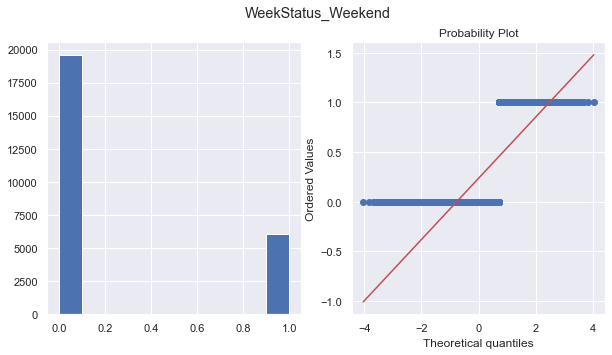

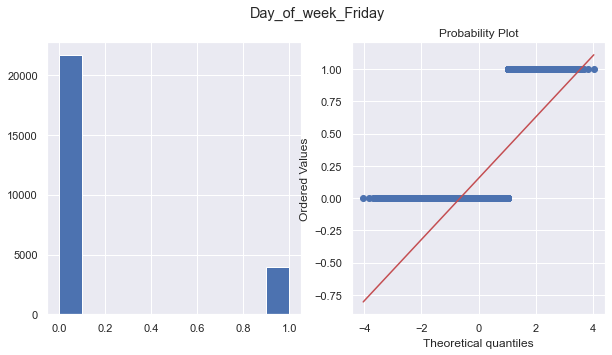

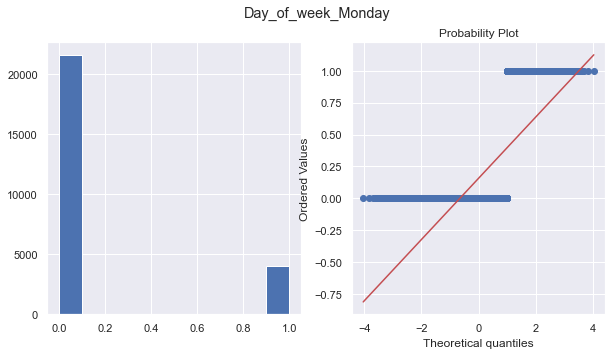

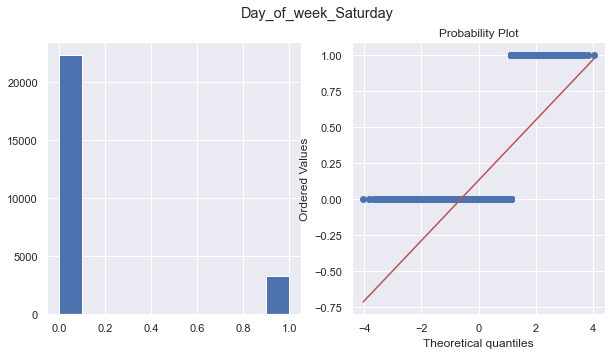

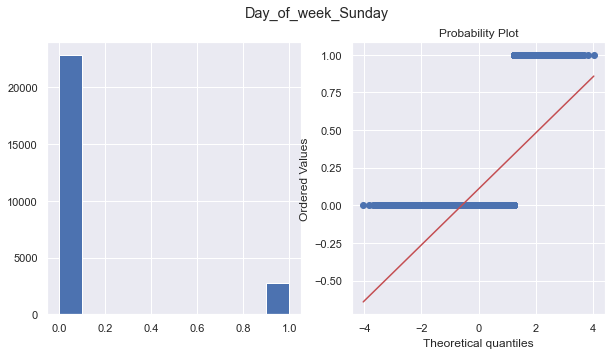

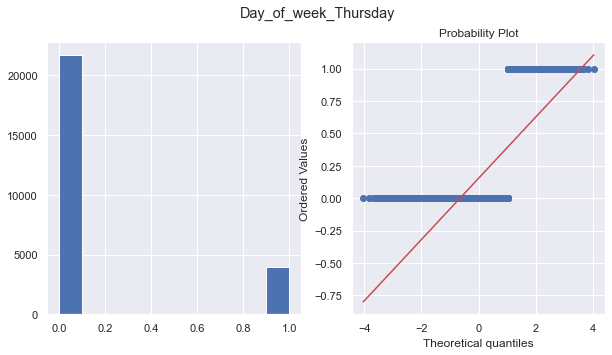

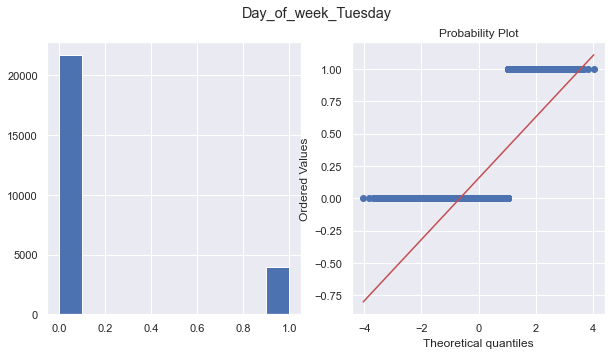

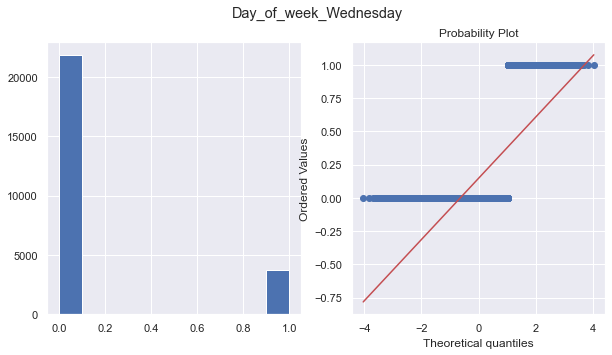

In [47]:
for col in df_siec_final:
    uni_bi_variate_analysis(df_siec_final,col)

Ideally, Target Variable for Linear Regression should be Normally Distributed over Mean & Variance.
But in our case, "Usage_kWh" is not exactly Normally Distributed as more than 14000 counts are there for value range 0-10.
Except this value range, target variable is Normally Distributed. We are not removing & transforming values for this said range as it affects around 40% of total Dataset.

<h4>2.1.3 Splitting Dataset into Train & Test dataset</h4>

Target Variable is Usage_kWh <br>
Splitting whole dataset into Training & Test dataset in 70:30 ratio.

In [48]:
X_reg = df_siec_final.iloc[:,df_siec_final.columns!='Usage_kWh']
y_reg = df_siec_final.iloc[:,df_siec_final.columns =='Usage_kWh']

In [49]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,y_reg, test_size=.3, random_state=25)

In [50]:
print(f"Dimension of Regression Training Set : X = {X_train_reg.shape} && Y = {y_train_reg.shape}")
print(f"Dimension of Regression Testing Set : X = {X_test_reg.shape} && Y = {y_test_reg.shape}")

Dimension of Regression Training Set : X = (17920, 21) && Y = (17920, 1)
Dimension of Regression Testing Set : X = (7680, 21) && Y = (7680, 1)


<h4>2.1.4 Feature Selection</h4>

using Embedded Method via Lasso Regularization

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

<h5>Removal of constant and quasi-constant Features</h5>

In [51]:
print(f"Shape of X b4 removal of constant features:  Training {X_train_reg.shape} & Testing {X_test_reg.shape}")

Shape of X b4 removal of constant features:  Training (17920, 21) & Testing (7680, 21)


In [52]:
sel = DropConstantFeatures(tol=0.998, variables=None, missing_values='raise')
sel.fit(X_train_reg)

DropConstantFeatures(tol=0.998)

In [53]:
print(f"Features to be dropped : {sel.features_to_drop_}")

Features to be dropped : ['date_year']


In [54]:
# remove the quasi-constant features

X_train_reg = sel.transform(X_train_reg)
X_test_reg = sel.transform(X_test_reg)

In [55]:
print(f"Shape of X after removal of quasi-constant features:  Training {X_train_reg.shape} & Testing {X_test_reg.shape}")

Shape of X after removal of quasi-constant features:  Training (17920, 20) & Testing (7680, 20)


<h5>Removal of duplicated features</h5>

In [56]:
# set up the selector
sel = DropDuplicateFeatures(variables=None, missing_values='raise')

# find the duplicate features
sel.fit(X_train_reg)

DropDuplicateFeatures(missing_values='raise')

In [57]:
print(f" Duplicated Feature Set : {sel.duplicated_feature_sets_}")

print(f" Duplicated Features to Drop  : {sel.features_to_drop_}")

 Duplicated Feature Set : []
 Duplicated Features to Drop  : set()


In [58]:
# remove the duplicated features

if not sel.features_to_drop_:
    X_train_reg = sel.transform(X_train_reg)
    X_test_reg = sel.transform(X_test_reg)

print(f"Shape of X after removal of duplicate features:  Training {X_train_reg.shape} & Testing {X_test_reg.shape}")

Shape of X after removal of duplicate features:  Training (17920, 20) & Testing (7680, 20)


<h5>Removal of Correlated Features using Smart Correlation Selection</h5>

In [59]:
# SmartCorrelationSelection using Variance

# correlation selector

sel = SmartCorrelatedSelection(
    variables=None,
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="variance",
    estimator=None,
    scoring="roc_auc",
    cv=3,
)

sel.fit(X_train_reg, y_train_reg)

SmartCorrelatedSelection(missing_values='raise', selection_method='variance')

In [60]:
if not sel.correlated_feature_sets_:
    print("There is no Correlated Features")
else:
    print(f"Set of Correlated Features : \n {sel.correlated_feature_sets_}")
    
if not sel.features_to_drop_:
    print("\n \n There is no Correlated Feature to drop")
else:
    print(f"\n \n Set of Correlated Features to be dropped : \n {sel.features_to_drop_}")

Set of Correlated Features : 
 [{'Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)'}, {'date_hour', 'NSM'}, {'WeekStatus_Weekday', 'WeekStatus_Weekend'}]

 
 Set of Correlated Features to be dropped : 
 ['CO2(tCO2)', 'date_hour', 'WeekStatus_Weekend']


In [61]:
# remove correlated features

X_train_reg = sel.transform(X_train_reg)
X_test_reg = sel.transform(X_test_reg)

print(f"Shape of X after removal of correlated features:  Training {X_train_reg.shape} & Testing {X_test_reg.shape}")

Shape of X after removal of correlated features:  Training (17920, 17) & Testing (7680, 17)


##### Feature Scaling (Independent Variables):

As Regression Models are affected by magnitude of Featues, 
Feature Scaling is required for these models & achived via StandardScaler.

In [62]:
# #Feature Scaling is performed via StandardScaler
# X_train_reg,X_test_reg = Encoding_StandardScaler(X_train_reg,X_test_reg)

In [63]:
scaler = StandardScaler()
scaler.fit(X_train_reg)

StandardScaler()

<h2>2.2 Machine Learning Activity</h2>

<h4>2.2.1 Regularization Type</h4>

Removal of Features using __Embedded Method__ via __Lasso Regularization__ due to followings: <br>
 - Embedded Method of Feature Selection has better predictive accuracy than filter method & faster than wrapper method
 - The L1 regularization (Lasso) is less likely to fit the noise of the training data and improves the generalization abilities of the model. 
 - L1 / Lasso will shrink some parameters to zero, therefore allowing for feature elimination (as opposed to Ridge/L2).

In [64]:
sel_lasso = SelectFromModel(Lasso(alpha=0.1, random_state=10))
sel_lasso.fit(scaler.transform(X_train_reg), y_train_reg)
# sel_.fit(X_train_reg, y_train_reg)

SelectFromModel(estimator=Lasso(alpha=0.1, random_state=10))

In [65]:
# let's visualise index of features that were selected

sel_lasso.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False])

In [66]:
# List with the selected features and print the outputs
selected_feat = X_train_reg.columns[(sel_lasso.get_support())]

print('total features: {}'.format((X_train_reg.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_lasso.estimator_.coef_ == 0)))

total features: 17
selected features: 13
features with coefficients shrank to zero: 4


In [67]:
# List of removed features detected via Lasso Regularization:

removed_feats = X_train_reg.columns[(sel_lasso.estimator_.coef_ == 0).ravel().tolist()]
print(f"List of removed features detected via Lasso Regularization : \n\n {removed_feats}")

List of removed features detected via Lasso Regularization : 

 Index(['NSM', 'Day_of_week_Monday', 'Day_of_week_Sunday',
       'Day_of_week_Wednesday'],
      dtype='object')


In [68]:
# remove features with zero coefficient from dataset
# and parse again as dataframe
X_train_reg_lasso = pd.DataFrame(sel_lasso.transform(X_train_reg))
X_test_reg_lasso = pd.DataFrame(sel_lasso.transform(X_test_reg))


In [69]:
sel_lasso.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False])

In [70]:
X_train_reg_lasso

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.50,0.00,62.89,100.00,0.0,3.0,28.0,30.0,1.0,0.0,0.0,0.0,0.0
1,3.60,0.00,67.35,100.00,0.0,7.0,8.0,30.0,0.0,0.0,0.0,0.0,0.0
2,3.56,0.00,62.36,100.00,0.0,6.0,25.0,45.0,1.0,0.0,0.0,0.0,0.0
3,37.04,0.00,88.25,100.00,2.0,11.0,19.0,30.0,1.0,0.0,0.0,0.0,0.0
4,7.13,0.04,99.15,100.00,2.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17915,1.33,1.73,99.96,99.93,2.0,1.0,20.0,45.0,0.0,0.0,1.0,0.0,0.0
17916,3.49,0.04,76.99,100.00,0.0,12.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0
17917,5.29,0.00,69.76,100.00,0.0,2.0,14.0,30.0,1.0,0.0,0.0,0.0,0.0
17918,8.71,1.37,99.31,99.98,1.0,4.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
# add columns name to dataframe
X_train_reg_lasso.columns = X_train_reg.columns[(sel_lasso.get_support())]
X_test_reg_lasso.columns = X_test_reg.columns[(sel_lasso.get_support())]

In [72]:
#  X_train_reg.iloc[0:0]
X_train_reg = X_train_reg_lasso.copy()
X_test_reg = X_test_reg_lasso.copy()

<h4>2.2.2 Attributes of Interest</h4>

In [98]:
print(f"Final Set of Independent Attributes selected for Linear Regression Model : \n\n{X_train_reg.columns}")

Final Set of Independent Attributes selected for Linear Regression Model : 

Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor',
       'Leading_Current_Power_Factor', 'Load_Type', 'date_month', 'date_day',
       'date_minute', 'WeekStatus_Weekday', 'Day_of_week_Friday',
       'Day_of_week_Saturday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday'],
      dtype='object')


In [99]:
print(f"Target Attribute selected for Linear Regression Model : \n\n{y_test_reg.columns}")

Target Attribute selected for Linear Regression Model : 

Index(['Usage_kWh'], dtype='object')


<h4>2.2.3 Base Classifier</h4>

LinearRegression Model is selected due to follosing reasons: <br>
 - It's transparent on how predictions are produced.
 - With Lasso we can ensure that the number of features used remains small.
 - Mathematically, it is straightforward & easy to estimate weights and you have a guarantee to find optimal weights (given all assumptions of the linear regression model are met by the data).

In [136]:
lnr_regressor = LinearRegression()

<h4>2.2.4 Training & Testing of Model</h4>

In [137]:
# Train Model using training X, y Data 
lnr_regressor.fit(X_train_reg, y_train_reg)

LinearRegression()

In [138]:
# Predict test Data
y_pred_lr = lnr_regressor.predict(X_test_reg)

In [139]:
print(y_pred_lr)

[[-2.05323114]
 [ 2.15286052]
 [55.55202076]
 ...
 [59.78798881]
 [84.67888273]
 [-4.15345993]]


<h2>2.3 Model Evaluation</h2>

<h4>2.3.1 Interpreting Coefficients</h4>

In [154]:
#Coefficients (y-intercept, beta coefficients)

print(f"y-intercept of model : {lnr_regressor.intercept_} \n\n")
print(f"Co-efficient of model : \n{X_train_reg.columns},\n\n {lnr_regressor.coef_}")
# list(zip(X_train_reg.columns, lnr_regressor.coef_))

y-intercept of model : [-78.57643511] 


Co-efficient of model : 
Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor',
       'Leading_Current_Power_Factor', 'Load_Type', 'date_month', 'date_day',
       'date_minute', 'WeekStatus_Weekday', 'Day_of_week_Friday',
       'Day_of_week_Saturday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday'],
      dtype='object'),

 [[ 1.32233009  0.27057577  0.57695523  0.44875265  5.52597273 -0.32479525
  -0.03351767 -0.008405   -0.55637537 -0.35678704  0.41491971 -0.57869926
   0.36784511]]


<h4>2.3.2 Evaluation Metrics</h4>

 - Mean absolute error (MAE): easiest to understand. Represents average error
 - Mean squared error (MSE): Similar to MAE but noise is exaggerated & larger errors are “punished”. harder to interpret than MAE
 - Root mean squared error (RMSE): Most popular metric, similar to MSE, however, result is square rooted to make more interpretable

In [131]:
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(y_test_reg,y_pred_lr)} ")
print(f"Mean Square Error (MSE) : {mean_squared_error(y_test_reg,y_pred_lr)}")
print(f"Root Mean Square Error (RMSE) : {np.sqrt(mean_squared_error(y_test_reg,y_pred_lr))}")

Mean Absolute Error (MAE) : 6.368421246720849 
Mean Square Error (MSE) : 73.16118849768016
Root Mean Square Error (RMSE) : 8.553431387325215


<h2>2.4 Observation about Result</h2>

R2 tends to optimistically estimate fit of linear regression. It always increases as number of effects are included in model. Adjusted R2 attempts to correct for this overestimation. Adjusted R2 might decrease if a specific effect does not improve model.

Adjusted R2 is always less than or equal to R2. A value of 1 indicates a model that perfectly predicts values in target field. A value that is less than or equal to 0 indicates a model that has no predictive value. In the real world, adjusted R2 lies between these values.

In [153]:
print(f"R-Squared(R2) Error : {r2_score(y_test_reg,y_pred_lr)}")
# print(f"Score : {lnr_reg_classifier.score(X_test_reg,y_test_reg)}")

r2_err = r2_score(y_test_reg,y_pred_lr)
no_test_obs = y_test_reg.shape[0]
no_ind_var = X_test_reg.shape[1]
x_adj = (1-r2_err)
y_adj = (no_test_obs - 1) / (no_test_obs - no_ind_var -1)
adj_rsquared = (1 - (x_adj * y_adj))
print(f"Adjusted R-Square Error : {adj_rsquared}")

R-Squared(R2) Error : 0.909937452828025
Adjusted R-Square Error : 0.909784724793426


Adjusted R2 is a corrected goodness-of-fit (model accuracy) measure for linear models. It identifies the percentage of variance in the target field that is explained by the input or inputs.

__As Value of Adjusted R2 is very near to 1 ( 0.909784724793426), our model almost perfectly predicts values in target field.__

<h1><center>3. Ensemble ML</h1></center>

<h3> 3.1 Pre-Processing / Feature Engineering <h23>

<h4>3.1.1 Ensemble Classification Model </h4>
Target Variable is Load_Type.<br>
As target variable is of Categorical type, Ensemble Classification Model need to be used.

In [83]:
X_ensm_clf = df_siec_final.iloc[:,df_siec_final.columns!='Load_Type']
y_ensm_clf = df_siec_final.iloc[:,df_siec_final.columns =='Load_Type']

<h4>3.1.2 Splitting Dataset into Train & Test dataset</h4>

Original Dataset is split into Train & Test dataset in 70:30 ratio.

In [84]:
X_train_ensm_clf, X_test_ensm_clf, y_train_ensm_clf, y_test_ensm_clf = train_test_split(X_ensm_clf,y_ensm_clf, test_size=.3, random_state=25)

In [85]:
print(f"Dimension of Ensemble Training Set : X = {X_train_ensm_clf.shape} && Y = {y_train_ensm_clf.shape}")
print(f"Dimension of Ensemble Testing Set : X = {X_test_ensm_clf.shape} && Y = {y_test_ensm_clf.shape}")

Dimension of Ensemble Training Set : X = (17920, 21) && Y = (17920, 1)
Dimension of Ensemble Testing Set : X = (7680, 21) && Y = (7680, 1)


<h4>3.1.3 Feature Selection</h4>
using Pipeline & Wrapper Method via Exhaustive Feature Selection

In [86]:
# we stack all the selection methods inside a pipeline

pipeline_ensm_clf = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
    ('correlation', SmartCorrelatedSelection(selection_method='variance')),
]
)

pipeline_ensm_clf.fit(X_train_ensm_clf)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [87]:
# removal of features after Feature Selection

X_train_ensm_clf = pipeline_ensm_clf.transform(X_train_ensm_clf)
X_test_ensm_clf = pipeline_ensm_clf.transform(X_test_ensm_clf)

X_train_ensm_clf.shape, X_test_ensm_clf.shape

((17920, 16), (7680, 16))

Removal of Features using __Wrapper Method__ via __Exhaustive Feature Selection__ due to followings: <br>
 - Wrapper Method of Feature Selection has better predictive accuracy than Filter & Embedded Methods
 - Best performing feature subset for the predefined classifier. 
 - Exhaustive Feature Selection (EFS) evaluates all combinations and determine the best subset of features compared to Step Forward Selection (SFS) & Step BACKWARD Selection (SBS)

 - Although this Greedy Sequential Algorithm is Computationally expensive, still Wrapper Method can be used considering fact that no. of independent variables are moderate (around 20).

In [88]:
# Wrapper Method via Exhaustive Feature Selection

efs = EFS(RandomForestClassifier(n_estimators=5,
                                n_jobs=4,
                                random_state=0,
                                max_depth=2),
          min_features=5,
          max_features=10,
          scoring='r2',
          print_progress=True,
          cv=2)

efs = efs.fit(np.array(X_train_ensm_clf), y_train_ensm_clf)

Features: 56063/56134

In [89]:
efs.best_idx_

In [90]:
selected_feat_ensm = X_train_ensm_clf.columns[list(efs.best_idx_)]
selected_feat_ensm

<h4>3.1.4 Feature Scaling (Independent Variables)</h4>

As Tree & Random Forest Models are not affected by magnitude of  Featues, 
Feature Scaling is not required for these models.

<h3> 3.2 Machine Learning Activity </h3>

<h4>3.2.1 Attributes of Interest</h4>

In [91]:
print(f"Final Set of Dependent Attributes selected Ensemble Modeling : \n\n{X_train_ensm_clf.columns}")

In [92]:
print(f"Target Attribute selected Ensemble Modeling : \n\n{y_test_ensm_clf.columns}")

<h4>3.2.2 Base Classifier</h4>


 - As already seen above, Tree based Model(Decision Tree) performs best in Classification category. Hence, we are using Tree based Ensemble model (Random Forest Model)
 - The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees.
 - It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset
 - HyperParameters :
  - n_estimators : Number of trees in the forest.
  - criterion : {"gini", "entropy", "log_loss"}, Function to measure quality of a split.

In [93]:
# from sklearn.ensemble import RandomForestRegressor
# HyperParamaters are set default as n_estimators = 100 , criterion = "gini"
rfc_ensemble = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=42)

<h4>3.2.3 Training & Testing of Model</4>

In [94]:
# fit regressor with x and y training data
rfc_ensemble.fit(X_train_ensm_clf, y_train_ensm_clf)

RandomForestClassifier(random_state=42)

In [95]:
#predict on test x data
y_pred_rfc = rfc_ensemble.predict(X_test_ensm_clf)

<h3>3.3 Model Evaluation</h3>

__As Random Forest Model performs Classification, same below Performnace Metrics of Classification Model can be used:__ 

 - Accuracy : Ratio of number of correct predictions to total number of predictions. Not a good choice with unbalanced classes.
 - Precision / Positive Predictive Value (PPV) : <br>
   Ratio of True Positives to all positives predicted by model. It is useful for skewed & unbalanced dataset. More False positives model predicts, lower the precision.
 - Recall / Sensitivity / True Positive Rate(TPR) : Ratio of true positives to all positives in your dataset.
 - F1-Score : Weighted average of precision and recall. Higher the F1 score, better is performance of our model. 

In [96]:
model_eval_list = pd.DataFrame(columns=['Model', 'Confusion Matrix', 'Accuracy', 'Classification Report'])
model, conf_matrix, accuracy_scr, class_rep = model_eval_classification('Ensemble (Random Forest)',y_test_ensm_clf,y_pred_rfc)
model_eval = [model,conf_matrix, accuracy_scr,class_rep]
model_eval_list.loc[len(model_eval_list)] = model_eval

txt_Model = "Model Name"
txt_Accuracy = "Accuracy"
txt_Precision = "Precision"
txt_Recall = "Recall"
txt_F1 = "F1-Score"

print(f"\033[1m{txt_Model:{30}} \t {txt_Accuracy:{20}} \t {txt_Precision:{20}} \t {txt_Recall:{20}} \t {txt_F1:{20}} \033[0m")
for row_ind in model_eval_list.index:
    print(f'''{model_eval_list['Model'][row_ind]:<{20}} \t {model_eval_list['Accuracy'][row_ind]:<{20}} \t {model_eval_list['Classification Report'][row_ind]['weighted avg']['precision']:<{20}}\t {model_eval_list['Classification Report'][row_ind]['weighted avg']['recall']:<{20}}\t {model_eval_list['Classification Report'][row_ind]['weighted avg']['f1-score']:<{20}}''')

Model Name                     	 Accuracy             	 Precision            	 Recall               	 F1-Score             
Ensemble (Random Forest) 	 0.9927083333333333   	 0.992705426877501   	 0.9927083333333333  	 0.9927062576527182  


<h3>3.4 Observation about Result</h3>

 - Accuracy, Precision, Recall & F1-Score are very HIGH (more than 99%) for Random Forest classification model.
 - Accuracy doesn’t grant us much information regarding distribution of false positives & false negatives.
 - Precision takes into account how both positive & negative samples were classified, but recall only considers positive samples    in its calculations.
 - Precision considers when a sample is classified as Positive, but it does not care about correctly classifying all positive  
   samples. Recall cares about correctly classifying all positive samples, but it does not care if a negative sample is  
   classified as positive.
 - Higher is F1 score of any model , better is its performance.

As F1 Score for __Random Forest classification__ is very high (0.9927062576527182), it's performance is very good for given DataSet. 

<h4>1.4.1 Visualizing the performance of our model</h4>

<h5>Plotting of Confusion Matrix</h5>

- Confusion Matrix: a table that shows number of correct & incorrect predictions made by model compared with actual classifications in test set 
- Also known as an error matrix, is a specific table layout that allows visualization of performance of an algorithm.

Visualuzation of Confusion Matrix for Random Forest Classifier : 


<Figure size 2160x720 with 0 Axes>

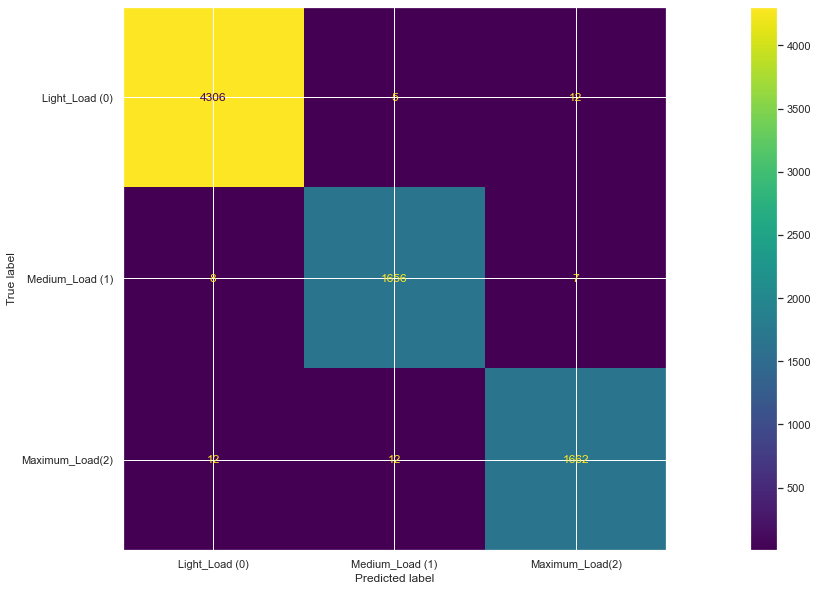

In [173]:
print(f"Visualuzation of Confusion Matrix for Random Forest Classifier : ")

fig_ens = plt.figure(figsize=(WIDTH_SIZE, HEIGHT_SIZE))

cf_model_ens = model_eval_list['Confusion Matrix'][0]
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cf_model_ens,display_labels=['Light_Load (0)', 'Medium_Load (1)', 'Maximum_Load(2)'])
cm_plot.plot()
plt.show()